<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual (0 = Male, 1 = Female)

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Distribution of the Data](#dist)**
5. **[Skewness and kurtosis](#sk)**
6. **[Correlation](#corr)**

**Import the required libraries**

In [1]:
# type your code here
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**Load the adults income dataset and print first five observations**

In [2]:
# type your code here
adults_income = pd.read_csv('adult_income.csv')

### Let's begin with some hands-on practice exercises

<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# type your code here
numerical = adults_income.columns[ adults_income.dtypes == 'int64']
categorical = adults_income.columns[ adults_income.dtypes != 'int64']
print('Numerical Variables: {}'.format(list(numerical)))
print('Categorical Variablse: {}'.format(list(categorical)))

Numerical Variables: ['age', 'fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week']
Categorical Variablse: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country', 'income']


<a id="ct"> </a>
## 2. Measures of Central Tendency

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here
print('Average Male age {}'.format(adults_income.age[adults_income.sex == 0].mean()))
print('Average Female age {}'.format(adults_income.age[adults_income.sex == 1].mean()))

Average Male age 39.43354749885268
Average Female age 36.85823043357163


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the value under which 95% of the capital gain would lie? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
adults_income['capital.gain'].quantile(0.95)

5013.0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here
adults_income.education.value_counts().head(1)

HS-grad    10501
Name: education, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
#Group by working class and Get median for age in each working class
pd.DataFrame(adults_income).groupby('workclass').age.median()

workclass
?                   35
Federal-gov         43
Local-gov           41
Never-worked        18
Private             35
Self-emp-inc        45
Self-emp-not-inc    44
State-gov           39
Without-pay         57
Name: age, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Compare the mean and trimmed mean of capital gain and comment on the presence of outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
adults_income_df = pd.DataFrame(adults_income)
print('Mean is {}'.format(adults_income_df['capital.gain'].mean()))
print('Trimmed mean with proprotioncut 8% is {}'.format(scipy.stats.trim_mean(adults_income_df['capital.gain'], proportiontocut = 0.08)))
print('Since the proportiontocut is a very small number means, lot of values as dispersed at boundaries')

Mean is 1077.6488437087312
Trimmed mean with proprotioncut 8% is 3.4938397981939824
Since the proportiontocut is a very small number means, lot of values as dispersed at boundaries


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. What is the percentage of the Asian-Pac-Islander race people in the data? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
print('Percentage of Asian-Pac-Islander race is {} '.format((adults_income_df.race[ adults_income_df.race == 'Asian-Pac-Islander'].count() / adults_income_df.race.count() ) * 100))

Percentage of Asian-Pac-Islander race is 3.190933939375326 


<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
adults_income_df.groupby('occupation')['hours.per.week'].var().sort_values(ascending=False).head(1)

occupation
Farming-fishing    299.987814
Name: hours.per.week, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 9. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here
# find the range
print("Range is {}  :  {}".format(adults_income_df['hours.per.week'].quantile(0.75),adults_income_df['hours.per.week'].quantile(0.25)))
print("Range difference is {}".format(adults_income_df['hours.per.week'].quantile(0.75)-adults_income_df['hours.per.week'].quantile(0.25)))

Range is 45.0  :  40.0
Range difference is 5.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
print("Variables with less deviation that can be excluded from analysis are \n{}".format(adults_income_df.std()[ adults_income_df.std() < 10 ]))

Variables with less deviation that can be excluded from analysis are 
education.num    2.572720
sex              0.470506
dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the percentage of variation in work hours for each workclass. Give an appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
round(adults_income_df.groupby('workclass')['hours.per.week'].var().sort_values(ascending=True), 3)

workclass
Never-worked          0.000
Federal-gov          78.121
Local-gov           116.026
Private             126.704
State-gov           136.820
Self-emp-inc        193.222
?                   222.305
Self-emp-not-inc    278.054
Without-pay         301.297
Name: hours.per.week, dtype: float64

<a id="dist"> </a>
## 4. Distribution of the Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Define a function to plot the categories of the variable and find the category with highest frequency</b>
                </font>
            </div>
        </td>
    </tr>
</table>

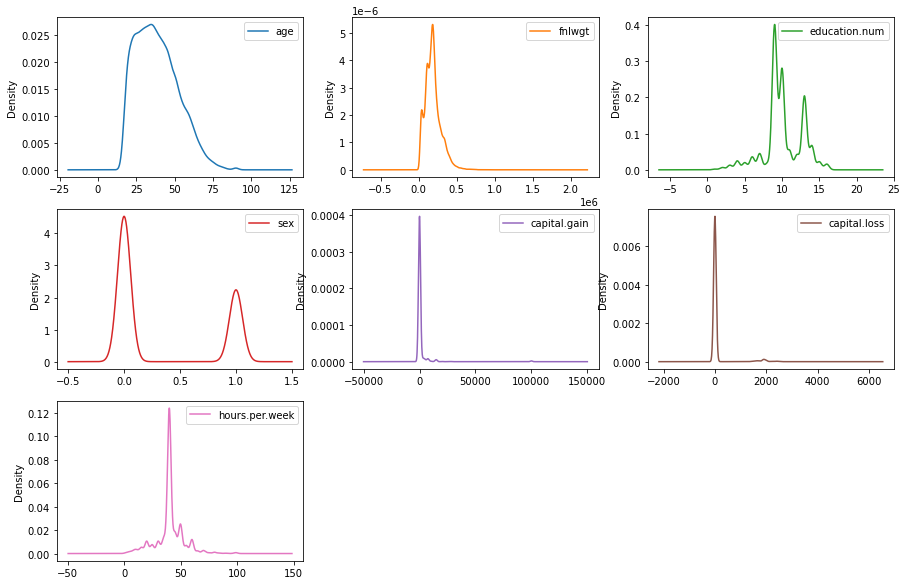

Column age is having highest category frequency is 36    898
Name: age, dtype: int64
Column workclass is having highest category frequency is Private    22696
Name: workclass, dtype: int64
Column fnlwgt is having highest category frequency is 123011    13
Name: fnlwgt, dtype: int64
Column education is having highest category frequency is HS-grad    10501
Name: education, dtype: int64
Column education.num is having highest category frequency is 9    10501
Name: education.num, dtype: int64
Column marital.status is having highest category frequency is Married-civ-spouse    14976
Name: marital.status, dtype: int64
Column occupation is having highest category frequency is Prof-specialty    4140
Name: occupation, dtype: int64
Column relationship is having highest category frequency is Husband    13193
Name: relationship, dtype: int64
Column race is having highest category frequency is White    27816
Name: race, dtype: int64
Column sex is having highest category frequency is 0    21790
Name: 

In [40]:
# type your code here

def plotCategoryGraph(): 
    plt.rcParams["figure.figsize"] = [15,10]
    adults_income_df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
    plt.show()

def identifyCategoryWithHigestFrequencyInEachVariable():
    for column in adults_income_df.columns:
        series = adults_income_df[column].value_counts().head(1)
        print("Column {} is having highest category frequency is {}".format(column, series))
        
plotCategoryGraph()
identifyCategoryWithHigestFrequencyInEachVariable()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Is there any variable which is normally distributed?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# type your code here
for column in adults_income_df.columns:
    if adults_income_df[column].dtypes == 'int64':
        k2, p = stats.normaltest(adults_income_df[column])
        if p == 3.5897196971978586e-178:
            print("Variable {} is normally distirbuted".format(column))

Variable education.num is normally distirbuted


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Identify the working class for most of the population in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
# type your code here
adults_income_df.workclass.value_counts().head(1)

Private    22696
Name: workclass, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. For how much time are most of the individuals working per week?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
# type your code here
adults_income_df['hours.per.week'].value_counts().head(1)

40    15214
Name: hours.per.week, dtype: int64

<a id="sk"> </a>
## 5. Skewness and kurtosis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

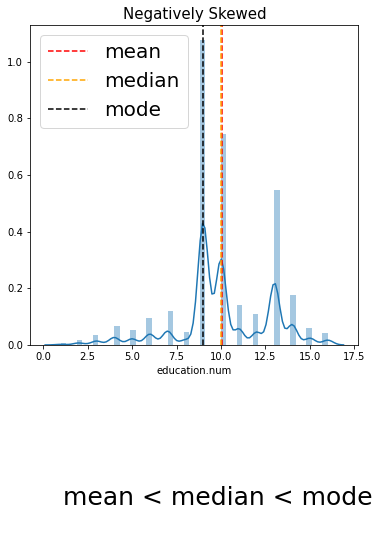

In [84]:
# type your code here
from matplotlib import gridspec

# set the plot size
plt.rcParams["figure.figsize"] = [20,15]

# divides the plot into the specified number of subplots 
gs = gridspec.GridSpec(3, 3, width_ratios=[2.5, 2.5, 2.5], height_ratios=[.20, .10, .15])

a1 = plt.subplot(gs[0, 0])
a1.set_title("Negatively Skewed", fontsize=15)
a1= sns.distplot(adults_income_df['education.num'])

mu = adults_income_df['education.num'].mean()                                 # calculate the mean
mo = adults_income_df['education.num'].mode()                                 # calculate the mode
me = adults_income_df['education.num'].median()                               # calculate the median

plt.axvline(x = mu, color='red',linestyle='--',label="mean")
plt.axvline(x = me, color='orange',linestyle='--',label="median")
plt.axvline(x = mo[0], color='black',linestyle='--',label="mode")

plt.legend(prop={'size': 20}) 

a2 = plt.subplot(gs[1, 0])                                      
a2.text(x = 0.1, y = 0.3, s="mean < median < mode", fontsize=25)  
a2.axis('off')
# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [85]:
# type your code here
# use skew() to calculate the skewness
skew = adults_income_df.skew()

# print the skewness
print(skew)

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
sex                0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.222241
dtype: float64


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

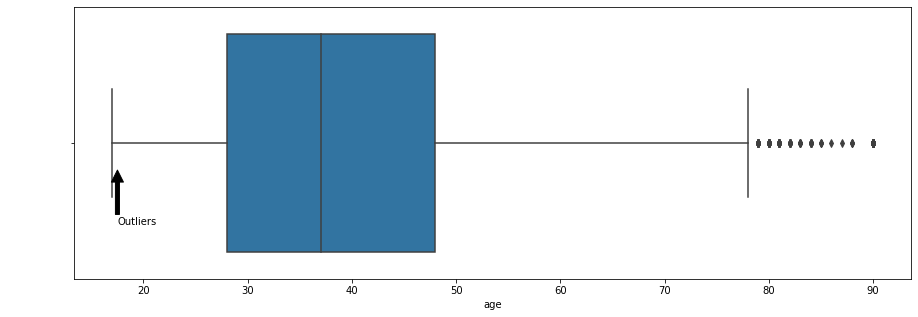

In [87]:
# type your code here
plt.figure(figsize=(15,5))

sns.boxplot(adults_income_df.age)

plt.annotate("Outliers",xy = (7.5,0.01), xytext = (7.5, 0.3),arrowprops = {'facecolor' : 'black'})
plt.annotate("Outliers",xy = (17.5,0.1),  xytext = (17.5, 0.3),arrowprops = {'facecolor' : 'black'} )

plt.show()

<a id="corr"> </a>
## 6. Correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

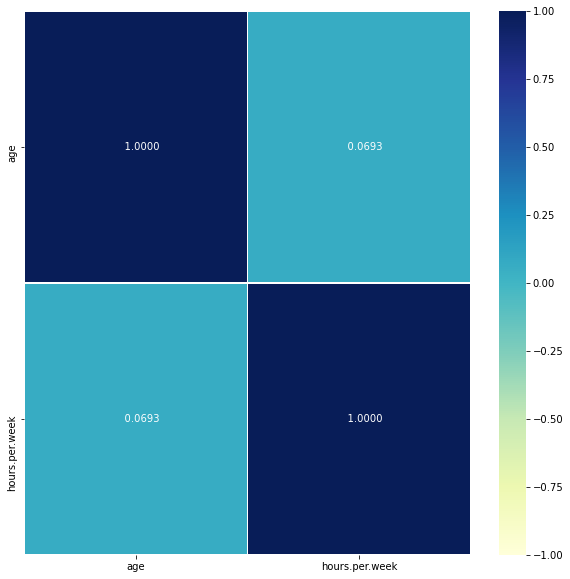

In [92]:
# type your code here

corr = adults_income_df[['age','hours.per.week']].corr()

fig,ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')

plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Visualize the upper triangular correlation matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

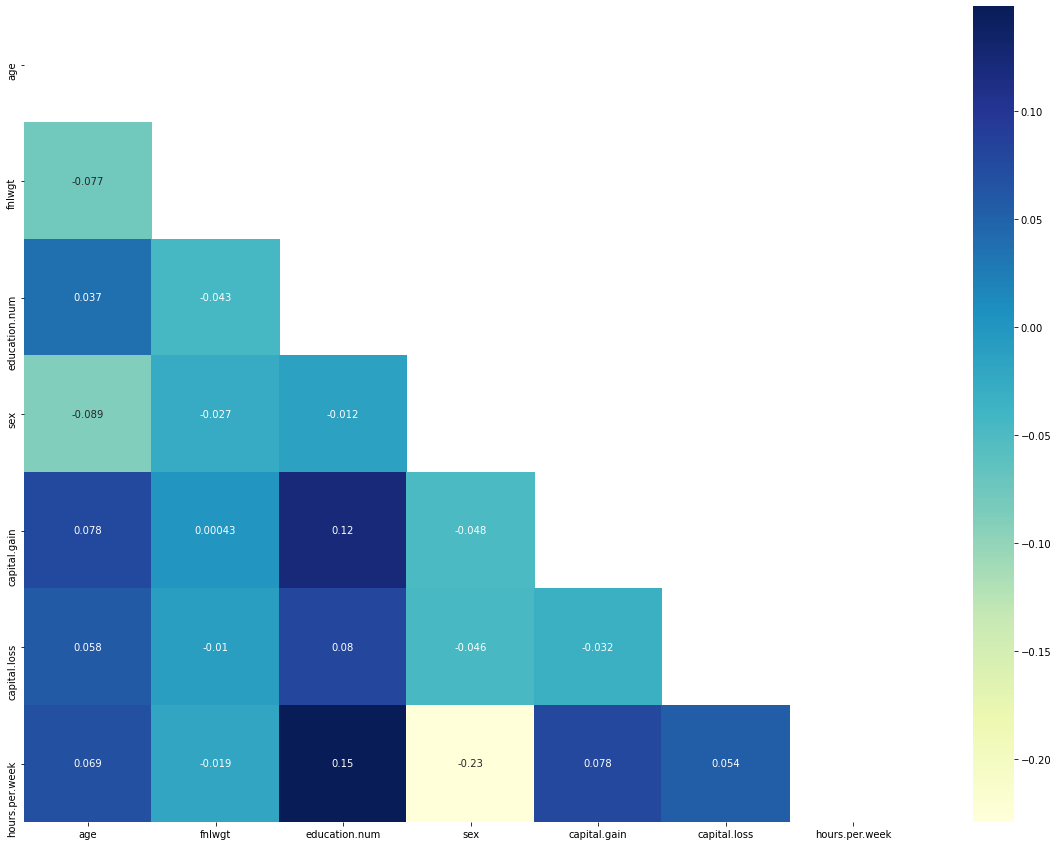

In [96]:
# type your code here
# creating mask 
mask = np.triu(np.ones_like(adults_income_df.corr())) 
  
# plotting a triangle correlation heatmap 
dataplot = sns.heatmap(adults_income_df.corr(), cmap="YlGnBu", annot=True, mask=mask) 

plt.show()